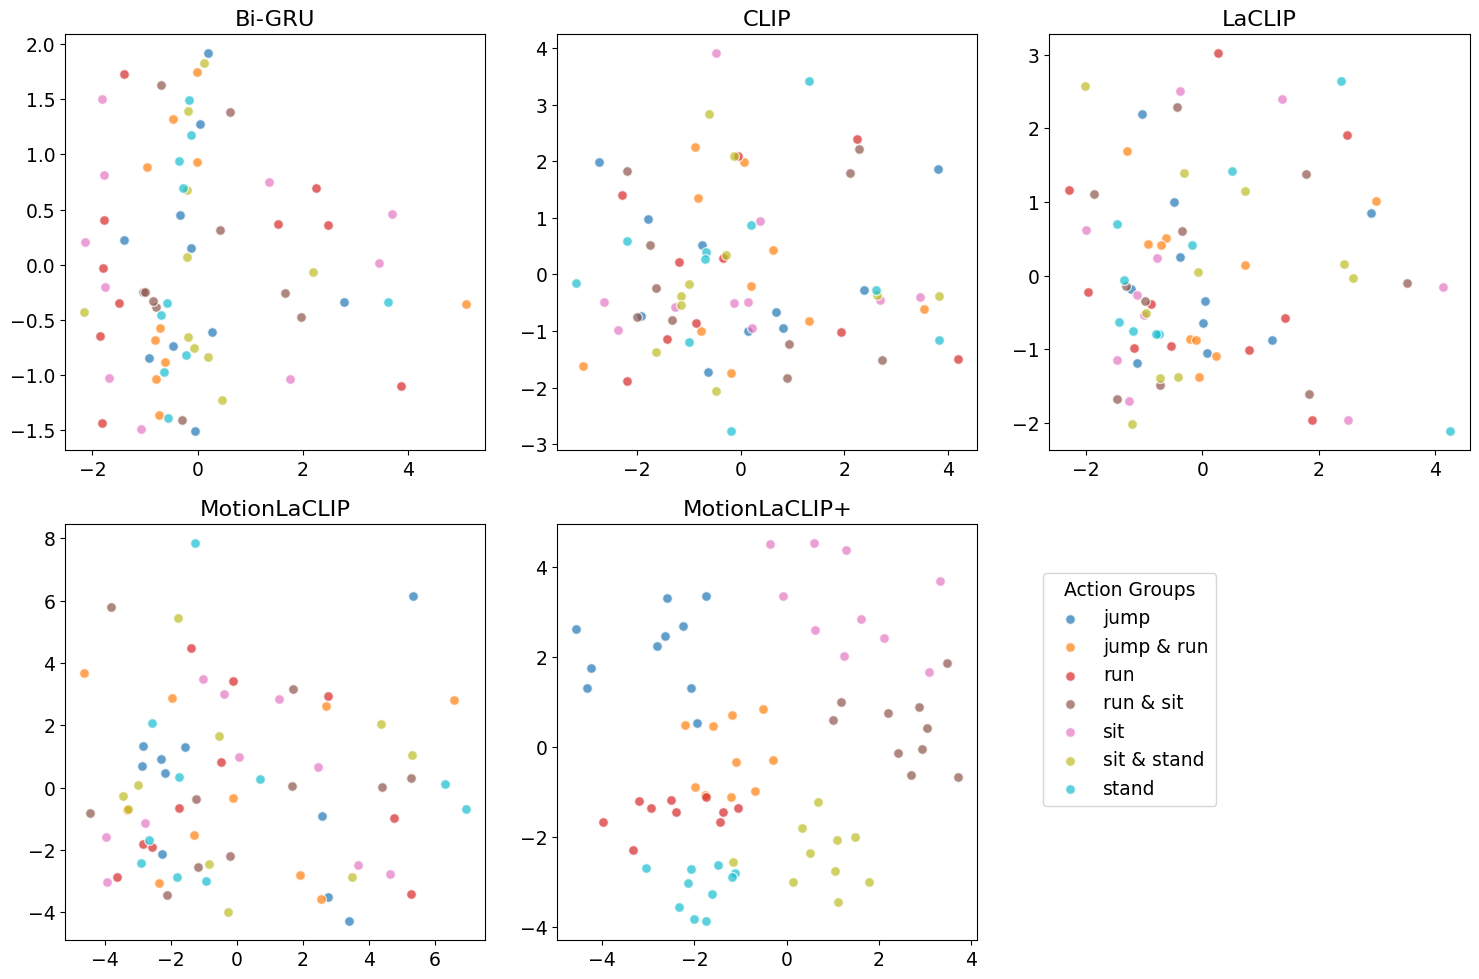

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Increase font size globally by 2 sizes
font = {'size': matplotlib.rcParams['font.size'] + 3.5}
matplotlib.rc('font', **font)

# Load the JSON data
with open('embeddings_by_model_1.json', 'r') as f:
    data = json.load(f)

# Define the action groups and models
action_groups = list(data['Bi-GRU'].keys())
models = list(data.keys())

# Define a color map for the actions
colors = plt.cm.tab10(np.linspace(0, 1, len(action_groups)))
color_map = {action: colors[i] for i, action in enumerate(action_groups)}

# Create a 3-column, 2-row subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Create a dictionary to collect scatter handles for the legend
legend_handles = {}

# Plot each model's embeddings
for i, model in enumerate(models):
    if i >= len(axes):
        break

    ax = axes[i]
    for action in action_groups:
        if action not in data[model]:
            print(f"Skipping missing action '{action}' in model '{model}'")
            continue

        embeddings = np.array(data[model][action]['embeddings_2d'])
        if embeddings.ndim != 2 or embeddings.shape[1] != 2:
            print(f"Invalid embedding shape for action '{action}' in model '{model}': {embeddings.shape}")
            continue

        scatter = ax.scatter(
            embeddings[:, 0],
            embeddings[:, 1],
            label=action,
            color=color_map[action],
            alpha=0.7,
            edgecolors='w',
            s=50
        )

        # Collect one handle per action group for the legend
        if action not in legend_handles:
            legend_handles[action] = scatter

    ax.set_title(model)
    # ax.set_xlabel('Component 1')
    # ax.set_ylabel('Component 2')

# Add a shared legend in the third column and second row
handles = list(legend_handles.values())
labels = list(legend_handles.keys())
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.76, 0.3), title="Action Groups")

# Remove unused subplots if there are any
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to leave space for the legend

# Save the plot as a PDF
plt.savefig("embeddings_plot.pdf", format="pdf")

plt.show()
